In [13]:
import pandas as pd

# Sample data
data = {
    'Description': [
        "McDonald's", "Netflix Subscription", "Uber Ride", "Panadol Tablet",
        "Electricity Bill", "Grocery Walmart", "Spotify Premium", "Doctor Visit",
        "Bus Ticket", "Water Utility", "Pizza Hut", "Train Fare", "Gym Membership",
        "Paracetamol", "Internet Charges", "Movie Ticket", "Taxi Ride", "Ice Cream",
        "Hospital Fee", "Mobile Recharge"
    ],
    'Category': [
        "Food", "Entertainment", "Transport", "Health",
        "Utilities", "Shopping", "Entertainment", "Health",
        "Transport", "Utilities", "Food", "Transport", "Entertainment",
        "Health", "Utilities", "Entertainment", "Transport", "Food",
        "Health", "Utilities"
    ]
}

# Create DataFrame and save it
df = pd.DataFrame(data)
df.to_csv('expense_data.csv', index=False)
df.head()


,Description,Category
0,McDonald's,Food
1,Netflix Subscription,Entertainment
2,Uber Ride,Transport
3,Panadol Tablet,Health
4,Electricity Bill,Utilities


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('expense_data.csv')

# Convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Description'])

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('custom_expense_dataset.csv')

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Convert text descriptions to TF-IDF vectors
X = vectorizer.fit_transform(df['Description'])

# Encode category labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")

# Get the unique labels present in the test set
unique_test_labels = np.unique(y_test)

# Use these unique labels to filter the target_names
target_names_for_report = [label_encoder.classes_[i] for i in unique_test_labels]


print(classification_report(y_test, y_pred, target_names=target_names_for_report, labels=unique_test_labels))

Accuracy: 0.00

Classification Report:

               precision    recall  f1-score   support

Entertainment       0.00      0.00      0.00       2.0
         Food       0.00      0.00      0.00       2.0

    micro avg       0.00      0.00      0.00       4.0
    macro avg       0.00      0.00      0.00       4.0
 weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [19]:
# Test on new descriptions
examples = [
    "Burger King", "Bus Fare", "Tylenol", "Cinema Entry", "Water Bill"
]

# Vectorize and predict
X_new = vectorizer.transform(examples)
predicted = model.predict(X_new)
categories = label_encoder.inverse_transform(predicted)

# Print predictions
for desc, cat in zip(examples, categories):
    print(f"{desc} → Predicted Category: {cat}")


Burger King → Predicted Category: Health
Bus Fare → Predicted Category: Transport
Tylenol → Predicted Category: Health
Cinema Entry → Predicted Category: Health
Water Bill → Predicted Category: Utilities


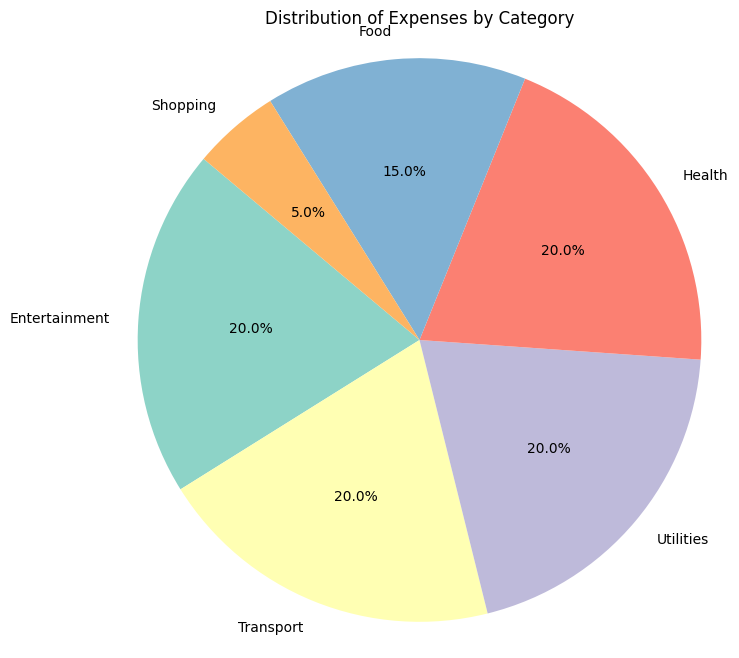

In [20]:
import matplotlib.pyplot as plt

# Count number of expenses per category
category_counts = df['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Distribution of Expenses by Category")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()
